Exploring the output files generated by the Salish Sea Atlantis Model
for the BC Parks Living Labs Project - preliminary runs

Scenarios
- control
- heatwave (2023 summer for 10 days)
- climate change (+2oC warming by 2050)

In [17]:
import os
import xarray as xr
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import ssam_groups as groups
import ssam_plot as splot

In [2]:

species_of_interest = { #benthic, 1 depth
    'macroalgae':'Macroalgae', 'seagrass':'Seagrass', 'bivalves':'Bivalves',
}

## scenario files

In [2]:
control_file = "/ocean/rlovindeer/MOAD/analysis-raisha/SSmodel_outputs/LivingLabs/control_01/outputSalishSea.nc"
heatwave_file = "/ocean/rlovindeer/MOAD/analysis-raisha/SSmodel_outputs/LivingLabs/heatwave_01/outputSalishSea.nc"
climate_file = "/ocean/rlovindeer/MOAD/analysis-raisha/SSmodel_outputs/LivingLabs/climate_01/outputSalishSea.nc"

control = xr.open_dataset(str(control_file), decode_cf=True)
heatwave = xr.open_dataset(str(heatwave_file), decode_cf=True)
climate = xr.open_dataset(str(climate_file), decode_cf=True)

t = np.ma.filled(control.variables['t'], np.nan)

In [4]:
# Masking based on temperature

Temps = np.ma.filled(control.Temp[1,:,5], np.nonzero)
(ocean_boxes) = Temps.nonzero()
ocean_boxes = ocean_boxes[0]
ocean_boxes = ocean_boxes[1:ocean_boxes.size-1]
ocean_boxes

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  13,  14,
        15,  16,  18,  19,  20,  21,  23,  26,  28,  31,  32,  33,  34,
        35,  36,  37,  38,  39,  40,  54,  55,  57,  58,  60,  62,  63,
        64,  66,  68,  72,  73,  74,  75,  79,  80,  81,  82,  83,  84,
        85,  86,  88,  90,  91,  92,  94,  96,  98, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 111, 112, 113, 114, 115, 116, 117, 118,
       119, 120, 121, 122, 123, 124])

## heatwaves

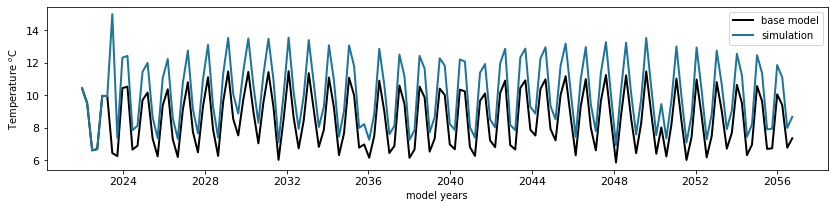

In [17]:
# Temperature at all depths - heatwave_01

start = 0 #after burn-in. Model start 2007 (112 if model start is 1992)
end = t.size-1

time = t[start:end]

# Plot variables
label_size = 11
font_size = 12
line_width = 2

fig, ax = plt.subplots(figsize = (14,3))
ax.tick_params(labelsize=label_size)

Temp_control = np.ma.filled(control.Temp[start:end,ocean_boxes,5], np.nonzero)
t1_control = Temp_control.mean(axis=1)
#t1_control = t1_control.mean(axis=1)

Temp_heatwave = np.ma.filled(heatwave.Temp[start:end,ocean_boxes,5], np.nonzero)
t1_heatwave = Temp_heatwave.mean(axis=1)
#t1_heatwave = t1_heatwave.mean(axis=1)

ax.plot(time, t1_control, 'k', linewidth = 2);
ax.plot(time, t1_heatwave, '#1e759a', linewidth = 2);
ax.legend(['base model','simulation'])
ax.set_ylabel('Temperature $^{o}$C');
ax.set_xlabel('model years');
ax.tick_params(labelsize=label_size)

In [249]:
# t_corrected = t - np.timedelta64(578, 'D')

start = 0 #after burn-in. Model start 2007 (112 if model start is 1992)
end = 50 #t.size-1

time = t[start:end]

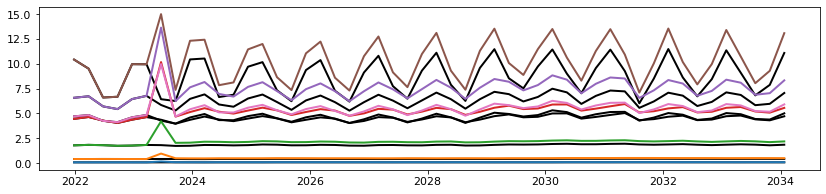

In [250]:
# Temperature at all depths - heatwave_01
fig, ax = plt.subplots(figsize = (14,3))
ax.tick_params(labelsize=label_size)

Temp_control = np.ma.filled(control.Temp[start:end,ocean_boxes,:], np.nan)
t_control = Temp_control.mean(axis=1)
t_control = Temp_control.mean(axis=1)

Temp_heatwave = np.ma.filled(heatwave.Temp[start:end,ocean_boxes,:], np.nan)
t_heatwave = Temp_heatwave.mean(axis=1)
t_heatwave = Temp_heatwave.mean(axis=1)

ax.plot(time, t_control, 'k', linewidth = 2);
ax.plot(time, t_heatwave, linewidth = 2);

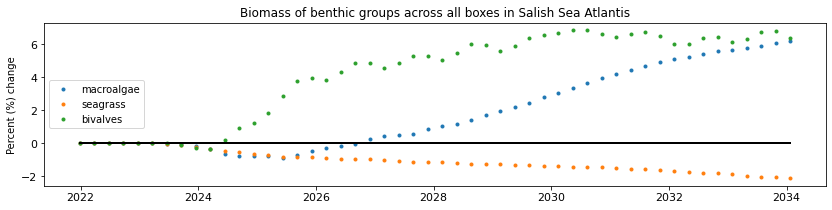

In [160]:
plot_benthic_box(species_of_interest, heatwave, 63)

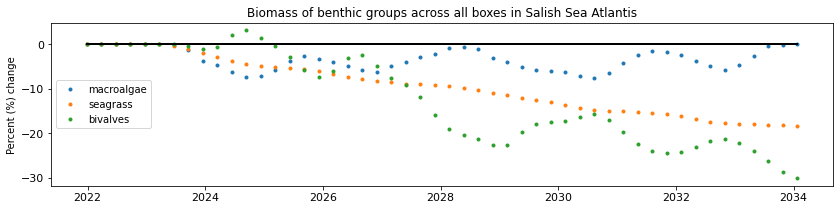

In [161]:
plot_benthic_box(species_of_interest, heatwave, 66)

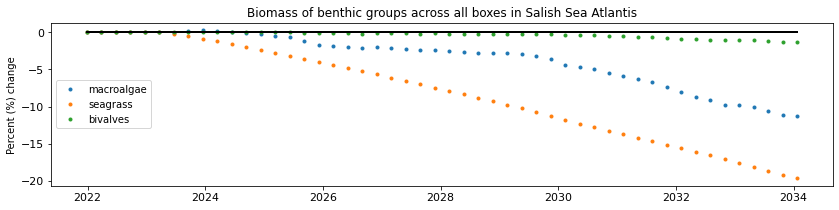

In [142]:
plot_benthic_box(species_of_interest, heatwave, 83)

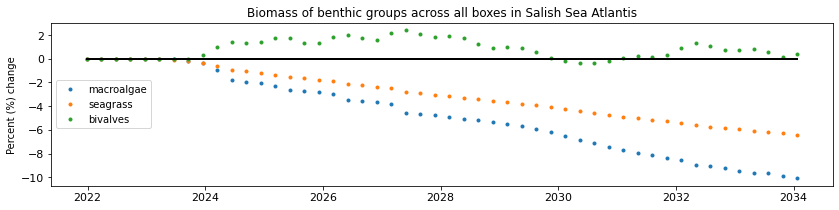

In [143]:
plot_benthic_box(species_of_interest, heatwave, 96)

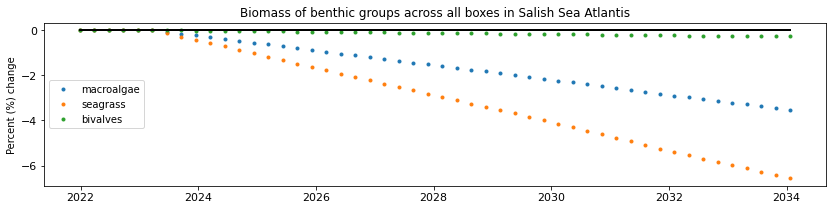

In [144]:
plot_benthic_box(species_of_interest, heatwave, 102)

In [130]:
t[10]

numpy.datetime64('2024-06-14T14:00:00.000000000')

In [23]:
str(t[18])

'2026-06-04T14:00:00.000000000'

In [24]:
# to date 2028-05-24T14:00:00.000000000 - 5 years(26), 2026-06-04T14:00:00.000000000 - 3 years(18), 2024-06-14T14:00:00.000000000 - 1 year(10)

boxes = [63, 66, 83, 96, 102]
years = [10, 18, 26]
locations = ['Trincomali Channel','Saanich Inlet','Sunshine coast','Hornby & Denman Islands','Cape Lazo']
bio_colours = ['#906D43','#4CA532','#145E1C']
#box colours '#3A7396'
heat_dataAggregate = pd.DataFrame({'Bivalves': [],
                    'Macroalgae': [],
                    'Seagrass': []},)

for box in boxes:
    for year in years:
        macroalgae1 = np.ma.filled(climate.variables['Macroalgae_N'][year,box], np.nan)
        m_control = np.ma.filled(control.variables['Macroalgae_N'][year,box], np.nan)
        seagrass1 = np.ma.filled(climate.variables['Seagrass_N'][year,box], np.nan)
        s_control = np.ma.filled(control.variables['Seagrass_N'][year,box], np.nan)
        bivalves1 = np.ma.filled(climate.variables['Bivalves_N'][year,box], np.nan)
        b_control = np.ma.filled(control.variables['Bivalves_N'][year,box], np.nan)

        macroalgae = (macroalgae1/m_control-1)*100
        seagrass = (seagrass1/s_control-1)*100
        bivalves = (bivalves1/b_control-1)*100

        bio_groups = ['Bivalves','Macroalgae','Seagrass',]
        results = [bivalves,macroalgae,seagrass]

        heat_dataAggregate.loc[len(heat_dataAggregate.index)] = [bivalves,macroalgae,seagrass]

heat_dataAggregate.shape

(15, 3)

In [25]:
data_indices = ['Trincomali Channel', '', '', 'Saanich Inlet','','', 'Sunshine coast','','','Hornby & Denman Islands','','','Cape Lazo','','',]
heat_dataAggregate.index = data_indices

In [26]:
heat_dataAggregate

,Bivalves,Macroalgae,Seagrass
Trincomali Channel,0.030169,-0.033857,-0.026552
,0.123920,-0.277339,-0.164454
,0.240841,-0.796452,-0.424058
Saanich Inlet,-0.208127,-0.375359,-0.211401
,0.090707,-2.186542,-1.119375
,-1.072612,-5.748847,-2.728366
Sunshine coast,-0.003304,-0.041207,-0.077410
,0.246495,1.595001,-0.548868
,0.787068,5.243286,-1.642776
Hornby & Denman Islands,0.086361,-0.163956,-0.067867


In [27]:
heat_dataAggregate.to_csv("/ocean/rlovindeer/MOAD/analysis-raisha/SSmodel_outputs/LivingLabs/climate_01/heat2_data_aggregate.csv")

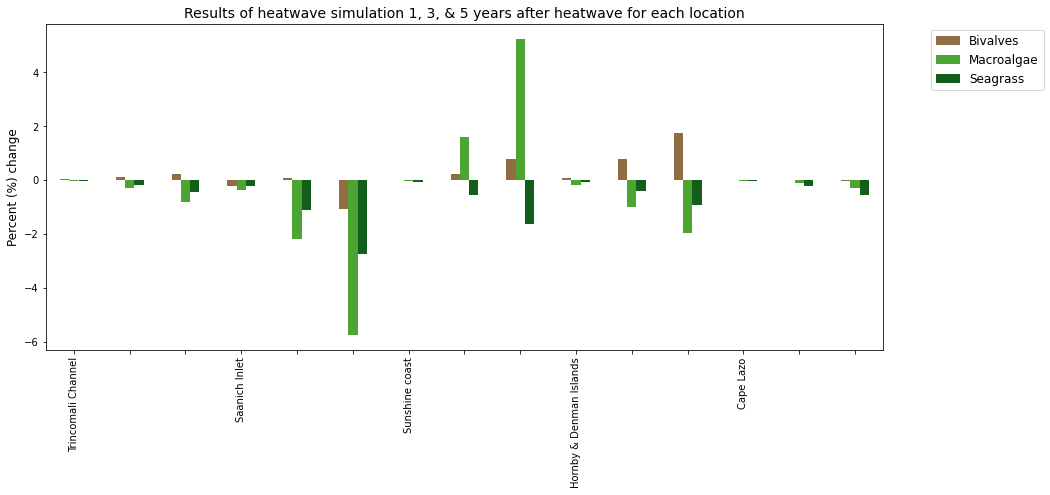

In [28]:
fig, ax = plt.subplots(figsize=(15, 6))
heat_dataAggregate.plot.bar(ax=ax, color=bio_colours)  
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)  # to place the legend outside
plt.ylabel('Percent (%) change', fontsize=12)
plt.title('Results of heatwave simulation 1, 3, & 5 years after heatwave for each location', fontsize=14);

## climate change

In [253]:
#If different time scale neeeded
start = 0
end = t.size-1

time = t[start:end]

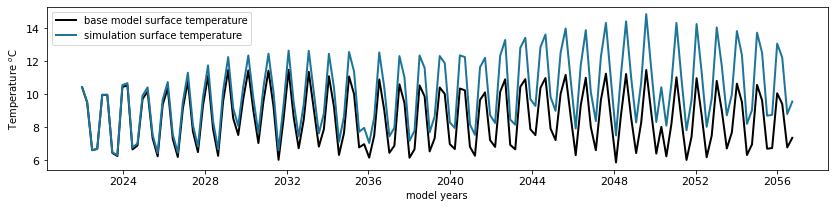

In [21]:
# Temperature at all depths - climate_01
fig, ax = plt.subplots(figsize = (14,3))
ax.tick_params(labelsize=label_size)

Temp_control = np.ma.filled(control.Temp[start:end,ocean_boxes,5], np.nan)
t_control = Temp_control.mean(axis=1)
#t_control = t_control.mean(axis=1)

Temp_climate = np.ma.filled(climate.Temp[start:end,ocean_boxes,5], np.nan)
t_climate = Temp_climate.mean(axis=1)
#t_climate = t_climate.mean(axis=1)

ax.plot(time, t_control, 'k', linewidth = 2);
ax.plot(time, t_climate, '#1e759a',linewidth = 2);
ax.legend(['base model surface temperature','simulation surface temperature'])
ax.set_ylabel('Temperature $^{o}$C');
ax.set_xlabel('model years');
ax.tick_params(labelsize=label_size)

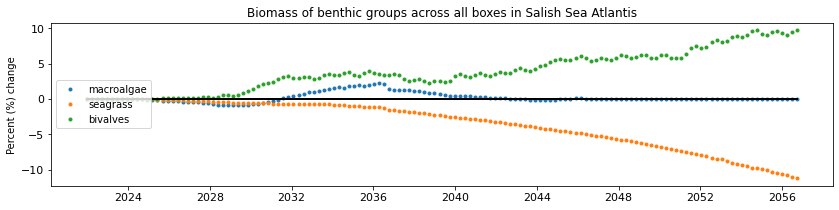

In [38]:
plot_benthic_box(species_of_interest, climate, 63) #Trincomali Channel

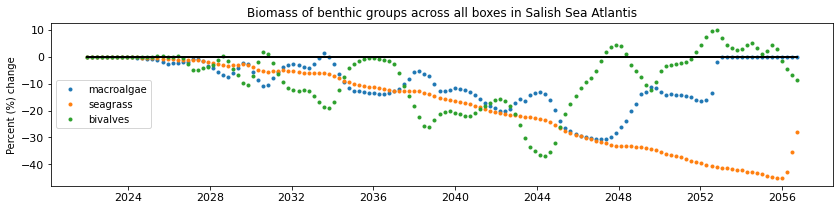

In [31]:
plot_benthic_box(species_of_interest, climate, 66) # Saanich Inlet

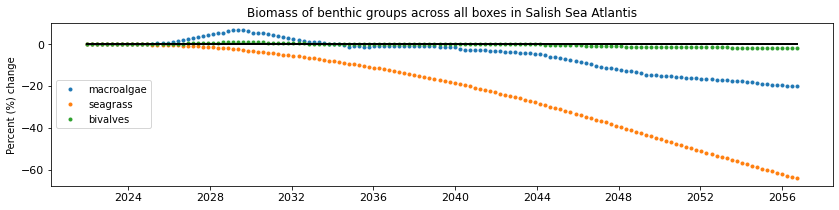

In [32]:
plot_benthic_box(species_of_interest, climate, 83) # Sunshine coast

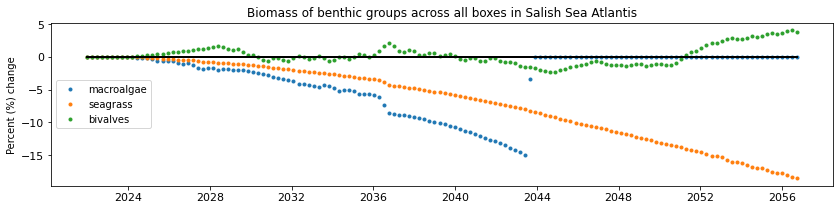

In [33]:
plot_benthic_box(species_of_interest, climate, 96) # Hornby & Denman Islands

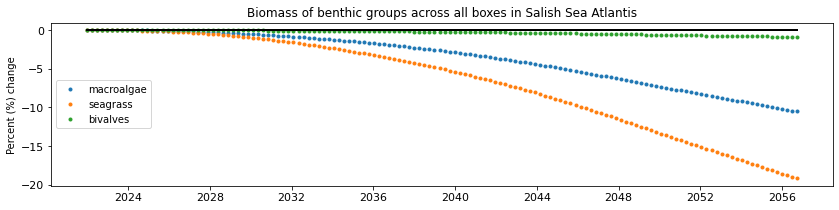

In [34]:
plot_benthic_box(species_of_interest, climate, 102) # Cape Lazo

In [58]:
t[128]

numpy.datetime64('2053-07-12T14:00:00.000000000')

In [ ]:
boxes = [63, 66, 83, 96, 102]
years = [47, 87, 128]
locations = ['Trincomali Channel','Saanich Inlet','Sunshine coast','Hornby & Denman Islands','Cape Lazo']
bio_colours = ['#906D43','#4CA532','#145E1C']
#box colours '#3A7396'

fig, ax = plt.subplots(figsize = (14,9))

In [92]:
len(boxes)

5

In [ ]:
# to date 2033-07-27T14:00:00.000000000 - 10 years ahead (47)
# to date 2043-06-05T14:00:00.000000000 - 20 years ahead (87)
# to date 2053-07-12T14:00:00.000000000 - 30 years ahead (128)

boxes = [63, 66, 83, 96, 102]
years = [47, 87, 128]
elapsed_time = [10, 20, 30]
locations = ['Trincomali Channel','Saanich Inlet','Sunshine coast','Hornby & Denman Islands','Cape Lazo']
bio_colours = ['#906D43','#4CA532','#145E1C']
#box colours '#3A7396'
dataAggregate = pd.DataFrame({'Bivalves': [],
                    'Macroalgae': [],
                    'Seagrass': []},)
size = len(boxes)*len(years)

for box in boxes:
    for year in years:
        macroalgae1 = np.ma.filled(climate.variables['Macroalgae_N'][year,box], np.nan)
        m_control = np.ma.filled(control.variables['Macroalgae_N'][year,box], np.nan)
        seagrass1 = np.ma.filled(climate.variables['Seagrass_N'][year,box], np.nan)
        s_control = np.ma.filled(control.variables['Seagrass_N'][year,box], np.nan)
        bivalves1 = np.ma.filled(climate.variables['Bivalves_N'][year,box], np.nan)
        b_control = np.ma.filled(control.variables['Bivalves_N'][year,box], np.nan)

        macroalgae = (macroalgae1/m_control-1)*100
        seagrass = (seagrass1/s_control-1)*100
        bivalves = (bivalves1/b_control-1)*100

        bio_groups = ['Bivalves','Macroalgae','Seagrass',]
        results = [bivalves,macroalgae,seagrass]
        print(year, box)

        dataAggregate.loc[len(dataAggregate.index)] = [bivalves,macroalgae,seagrass]

dataAggregate.shape


In [117]:
data_indices = ['Trincomali Channel', '', '', 'Saanich Inlet','','', 'Sunshine coast','','','Hornby & Denman Islands','','','Cape Lazo','','',]
dataAggregate.index = data_indices

In [118]:
dataAggregate

,Bivalves,Macroalgae,Seagrass
Trincomali Channel,3.410421,1.271549,-0.764231
,4.097844,-0.018757,-3.755857
,8.736682,0.000000,-8.993366
Saanich Inlet,-18.655201,1.182265,-6.086792
,-30.266872,-16.273863,-22.261926
,3.142349,0.000000,-41.617856
Sunshine coast,0.215368,0.476825,-7.514599
,-0.085962,-4.165405,-26.575190
,-1.599080,-17.469389,-55.390003
Hornby & Denman Islands,-0.160723,-4.324396,-2.451838


In [147]:
dataAggregate.to_csv("/ocean/rlovindeer/MOAD/analysis-raisha/SSmodel_outputs/LivingLabs/climate_01/data_aggregate.csv")

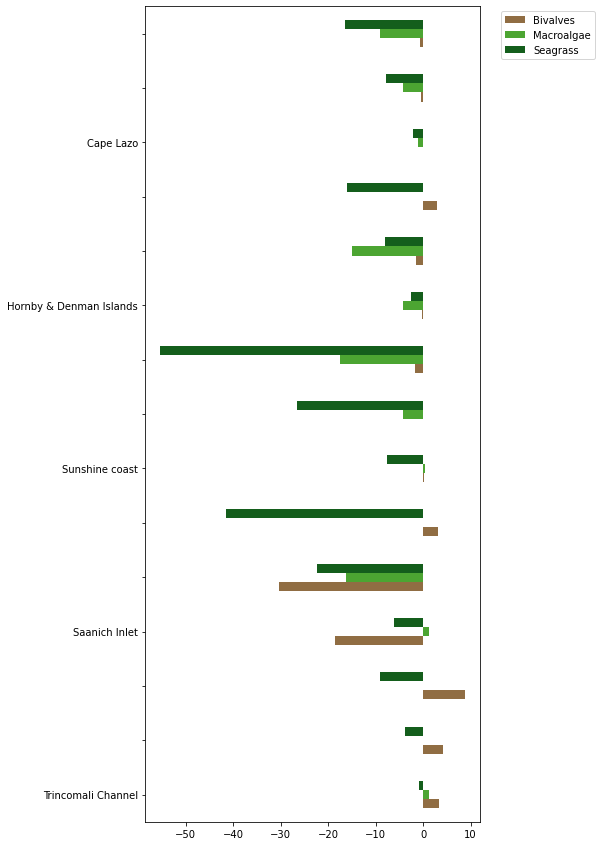

In [254]:
fig, ax = plt.subplots(figsize=(6, 15))
dataAggregate.plot.barh(ax=ax, color=bio_colours)  # ax=ax lets the dataframe plot use the subplot axes
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left');  # place the legend outside

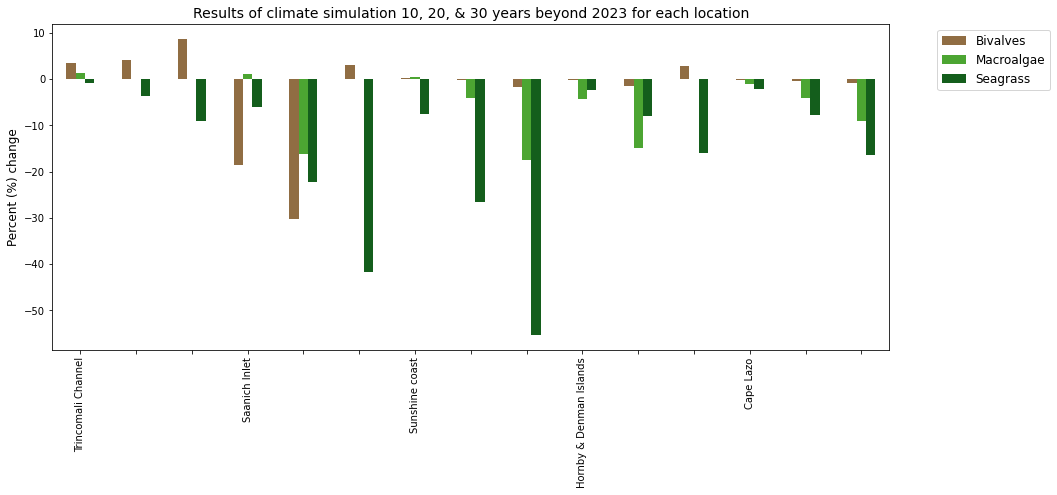

In [155]:
fig, ax = plt.subplots(figsize=(15, 6))
dataAggregate.plot.bar(ax=ax, color=bio_colours)  
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)  # to place the legend outside
plt.ylabel('Percent (%) change', fontsize=12)
plt.title('Results of climate simulation 10, 20, & 30 years beyond 2023 for each location', fontsize=14);

In [ ]:
# Across whole
years = [47, 87, 128]
elapsed_time = [10, 20, 30]
locations = ['Trincomali Channel','Saanich Inlet','Sunshine coast','Hornby & Denman Islands','Cape Lazo']
bio_colours = ['#906D43','#4CA532','#145E1C']
#box colours '#3A7396'
dataAggregate = pd.DataFrame({'Bivalves': [],
                    'Macroalgae': [],
                    'Seagrass': []},)
size = len(boxes)*len(years)

for box in boxes:
    for year in years:
        macroalgae1 = np.ma.filled(climate.variables['Macroalgae_N'][year,box], np.nan)
        m_control = np.ma.filled(control.variables['Macroalgae_N'][year,box], np.nan)
        seagrass1 = np.ma.filled(climate.variables['Seagrass_N'][year,box], np.nan)
        s_control = np.ma.filled(control.variables['Seagrass_N'][year,box], np.nan)
        bivalves1 = np.ma.filled(climate.variables['Bivalves_N'][year,box], np.nan)
        b_control = np.ma.filled(control.variables['Bivalves_N'][year,box], np.nan)

        macroalgae = (macroalgae1/m_control-1)*100
        seagrass = (seagrass1/s_control-1)*100
        bivalves = (bivalves1/b_control-1)*100

        bio_groups = ['Bivalves','Macroalgae','Seagrass',]
        results = [bivalves,macroalgae,seagrass]
        print(year, box)

        dataAggregate.loc[len(dataAggregate.index)] = [bivalves,macroalgae,seagrass]

dataAggregate.shape

## more on climate

Exploring additional locations and groups based on discussion with Stephen Ban, BC Parks

In [7]:
scenarios = [climate]

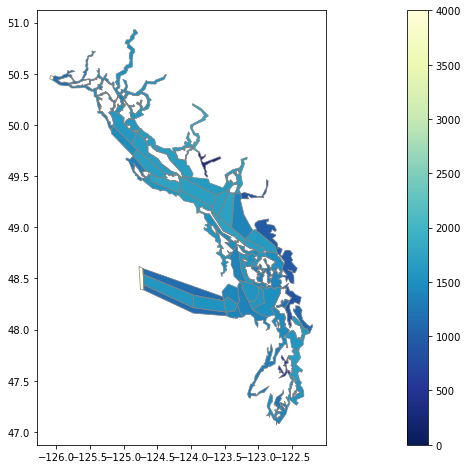

In [16]:
shapefile_name = "/ocean/rlovindeer/Atlantis/ssam_oceanparcels/SalishSea/SalishSea_July172019_2/SalishSea_July172019.shp"
map_df = gpd.read_file(shapefile_name)
map_df = map_df.sort_values(by=['BOX_ID'])
box_depth = map_df['BOTZ']
land_boxes = box_depth==0
land_boxes = map_df.index[land_boxes]
land_df = map_df.loc[land_boxes]
_cmap = cm.YlGnBu_r
ax = plt.figure

fig = plt.figure(figsize=(29, 8), facecolor='white') #figsize=(9, 12)
gs = plt.GridSpec(1, len(scenarios), wspace=0.5, hspace=0.2, height_ratios=[1],)

dVar_s = climate.variables['Temp'][87,:,5]
#Temp = dVar_s.sum(axis=0)

# Add scenario data to Atlantis spatial data
map_df['Temp'] = Temp
map_df.loc[land_boxes, 'Temp'] = 0

ax = fig.add_subplot(gs[0, 0])
ax = map_df.plot(column = 'Temp', cmap=_cmap, ax=ax,
    legend=True, #legend_kwds={'label': variable_name + ' % difference from control'},
    )
map_df.boundary.plot(ax=ax, color='grey', linewidths=0.7)
land_df.plot(ax=ax, color='white');

Atlantis Boxes thaat correspond to new locations

- Desolation sound **129**
- southern Gulf Islands: 60, 64, **68**, 62, 63
- Vancouver harbour: **75**, 80
- southern tip of Vancouver Island: **5**, 8, 9 
- Juan de Fuca Strait: 1, **2**, 3, 4


In [ ]:
# to date 2033-07-27T14:00:00.000000000 - 10 years ahead (47)
# to date 2043-06-05T14:00:00.000000000 - 20 years ahead (87)
# to date 2053-07-12T14:00:00.000000000 - 30 years ahead (128)

boxes = [129, 68, 75, 5, 2]
years = [47, 87, 128]
elapsed_time = [10, 20, 30]
locations = ['Desolation Sound','Southern Gulf Islands','Vancouver Harbour','South tip Vancouver Island','Juan de Fuca Strait']
bio_colours = ['#906D43','#4CA532','#145E1C']
#box colours '#3A7396'
dataAggregate2 = pd.DataFrame({'Bivalves': [],
                    'Macroalgae': [],
                    'Seagrass': []},)
size = len(boxes)*len(years)

for box in boxes:
    for year in years:
        macroalgae1 = np.ma.filled(climate.variables['Macroalgae_N'][year,box], np.nan)
        m_control = np.ma.filled(control.variables['Macroalgae_N'][year,box], np.nan)
        seagrass1 = np.ma.filled(climate.variables['Seagrass_N'][year,box], np.nan)
        s_control = np.ma.filled(control.variables['Seagrass_N'][year,box], np.nan)
        bivalves1 = np.ma.filled(climate.variables['Bivalves_N'][year,box], np.nan)
        b_control = np.ma.filled(control.variables['Bivalves_N'][year,box], np.nan)

        macroalgae = (macroalgae1/m_control-1)*100
        seagrass = (seagrass1/s_control-1)*100
        bivalves = (bivalves1/b_control-1)*100

        bio_groups = ['Bivalves','Macroalgae','Seagrass',]
        results = [bivalves,macroalgae,seagrass]
        print(year, box)

        dataAggregate2.loc[len(dataAggregate2.index)] = [bivalves,macroalgae,seagrass];

In [20]:
dataAggregate2.shape

(15, 3)

In [23]:
data_indices = ['Desolation Sound', '', '', 'Southern Gulf Islands','','', 'Vancouver Harbour','','','South tip Vancouver Island','','','Juan de Fuca Strait','','',]
dataAggregate2.index = data_indices

In [24]:
dataAggregate2.to_csv("/ocean/rlovindeer/MOAD/analysis-raisha/SSmodel_outputs/LivingLabs/climate_01/more_locations.csv")

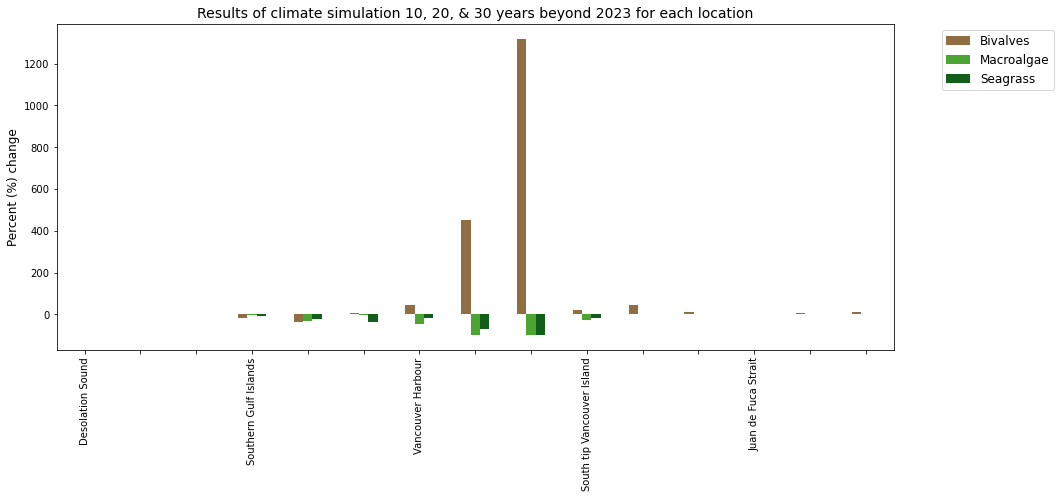

In [25]:
fig, ax = plt.subplots(figsize=(15, 6))
dataAggregate2.plot.bar(ax=ax, color=bio_colours)  
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)  # to place the legend outside
plt.ylabel('Percent (%) change', fontsize=12)
plt.title('Results of climate simulation 10, 20, & 30 years beyond 2023 for each location', fontsize=14);

In [48]:
t[0]

numpy.datetime64('2021-12-27T14:00:00.000000000')

In [51]:
start = 0 #after burn-in. Model start 2007 (112 if model start is 1992)
end = t.size-1
event_start = t[start]

time = t

In [65]:
# Plot variables
label_size = 11
font_size = 12
line_width = 2

def map_benthic(variable_name, scenario, control, time, years, start, end, v_max=100, v_min=-100):
    # map of single variable ratio at a specific time index
    
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    
    shapefile_name = "/ocean/rlovindeer/Atlantis/ssam_oceanparcels/SalishSea/SalishSea_July172019_2/SalishSea_July172019.shp"
    map_df = gpd.read_file(shapefile_name)
    map_df = map_df.sort_values(by=['BOX_ID'])
    box_depth = map_df['BOTZ']
    land_boxes = box_depth==0
    land_boxes = map_df.index[land_boxes]
    land_df = map_df.loc[land_boxes]

    _cmap = cm.coolwarm # RdGy_r #cm.PuOr_r cm.bwr cm.ocean_r 

    dVar_control = control.variables[variable_name]
    box_sum_control = dVar_control.sum(axis=1)
    control_ratio = (box_sum_control / box_sum_control-1)*100

    dVar_s = scenario.variables[variable_name]      
    box_sum_scenario = dVar_s.sum(axis=1) 
    scenario_ratio = (box_sum_scenario / box_sum_control-1)*100

    fig = plt.figure(figsize=(18, 12), facecolor='white')
    gs = plt.GridSpec(2, len(years), height_ratios=[1, 3])
    ax_ts = fig.add_subplot(gs[0,:])
    ax_ts.plot(time[start:end], control_ratio[start:end], 'k', linewidth = line_width)
    ax_ts.plot(time[start:end], scenario_ratio[start:end], linewidth = line_width)
    ax_ts.set_title('Percent (%) Change in '+ variable_name, fontsize = font_size)
    ax_ts.set_ylabel('Percent (%) Change', fontsize = font_size)

    position = 0
   
    for time_index in years:
    
        ts_date = np.array(time[time_index])
        ax_ts.plot([ts_date, ts_date], [scenario_ratio.min(), scenario_ratio.max()], '--')

        ## Select specific time period
        tVar_control = dVar_control[time_index,:]
        tVar_s = dVar_s[time_index,:]
        climate_ratio = (tVar_s / tVar_control -1)*100

        # Add scenario data to Atlantis spatial data
        map_df['scen'] = climate_ratio
        map_df.loc[land_boxes, 'scen'] = 0

        ax = fig.add_subplot(gs[1,position])
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=-0.5) 
        ax = map_df.plot(column = 'scen', cmap=_cmap, ax=ax, vmin=v_min, vmax=v_max, cax=cax,
            legend=True,
            #legend_kwds={'label': variable_name + ' percent (%) change'},
            )
        ax.set_title(str(time[time_index]), fontsize = font_size)
        map_df.boundary.plot(ax=ax, color='grey', linewidths=0.7)
        land_df.plot(ax=ax, color='white')
        position = position+1

    ax_ts.legend(['control','climate scenario', '10y after', '20y after', '30y after'], loc='lower left')
    ax_ts.tick_params(labelsize=label_size)

    return

def map_pelagic(variable_name, scenario, control, time, years, start, end, v_max=100, v_min=-100):
    # map of single variable ratio at a specific time index
    
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    
    shapefile_name = "/ocean/rlovindeer/Atlantis/ssam_oceanparcels/SalishSea/SalishSea_July172019_2/SalishSea_July172019.shp"
    map_df = gpd.read_file(shapefile_name)
    map_df = map_df.sort_values(by=['BOX_ID'])
    box_depth = map_df['BOTZ']
    land_boxes = box_depth==0
    land_boxes = map_df.index[land_boxes]
    land_df = map_df.loc[land_boxes]

    _cmap = cm.coolwarm # RdGy_r #cm.PuOr_r cm.bwr cm.ocean_r 

    dVar_control = control.variables[variable_name]
    dVar_control = dVar_control.sum(axis=2)
    box_sum_control = dVar_control.sum(axis=1)
    control_ratio = (box_sum_control / box_sum_control-1)*100

    dVar_s = scenario.variables[variable_name] 
    dVar_s = dVar_s.sum(axis=2)     
    box_sum_scenario = dVar_s.sum(axis=1) 
    scenario_ratio = (box_sum_scenario / box_sum_control-1)*100

    fig = plt.figure(figsize=(18, 12), facecolor='white')
    gs = plt.GridSpec(2, len(years), height_ratios=[1, 3])
    ax_ts = fig.add_subplot(gs[0,:])
    ax_ts.plot(time[start:end], control_ratio[start:end], 'k', linewidth = line_width)
    ax_ts.plot(time[start:end], scenario_ratio[start:end], linewidth = line_width)
    ax_ts.set_title('Percent (%) Change in '+ variable_name, fontsize = font_size)
    ax_ts.set_ylabel('Percent (%) Change', fontsize = font_size)

    position = 0
   
    for time_index in years:
    
        ts_date = np.array(time[time_index])
        ax_ts.plot([ts_date, ts_date], [scenario_ratio.min(), scenario_ratio.max()], '--')

        ## Select specific time period
        tVar_control = dVar_control[time_index,:]
        tVar_s = dVar_s[time_index,:]
        climate_ratio = (tVar_s / tVar_control -1)*100

        # Add scenario data to Atlantis spatial data
        map_df['scen'] = climate_ratio
        map_df.loc[land_boxes, 'scen'] = 0

        ax = fig.add_subplot(gs[1,position])
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=-0.5) 
        ax = map_df.plot(column = 'scen', cmap=_cmap, ax=ax, vmin=v_min, vmax=v_max, cax=cax,
            legend=True,
            #legend_kwds={'label': variable_name + ' percent (%) change'},
            )
        ax.set_title(str(time[time_index]), fontsize = font_size)
        map_df.boundary.plot(ax=ax, color='grey', linewidths=0.7)
        land_df.plot(ax=ax, color='white')
        position = position+1

    ax_ts.legend(['control','climate scenario', '10y after', '20y after', '30y after'], loc='lower left')
    ax_ts.tick_params(labelsize=label_size)

    return

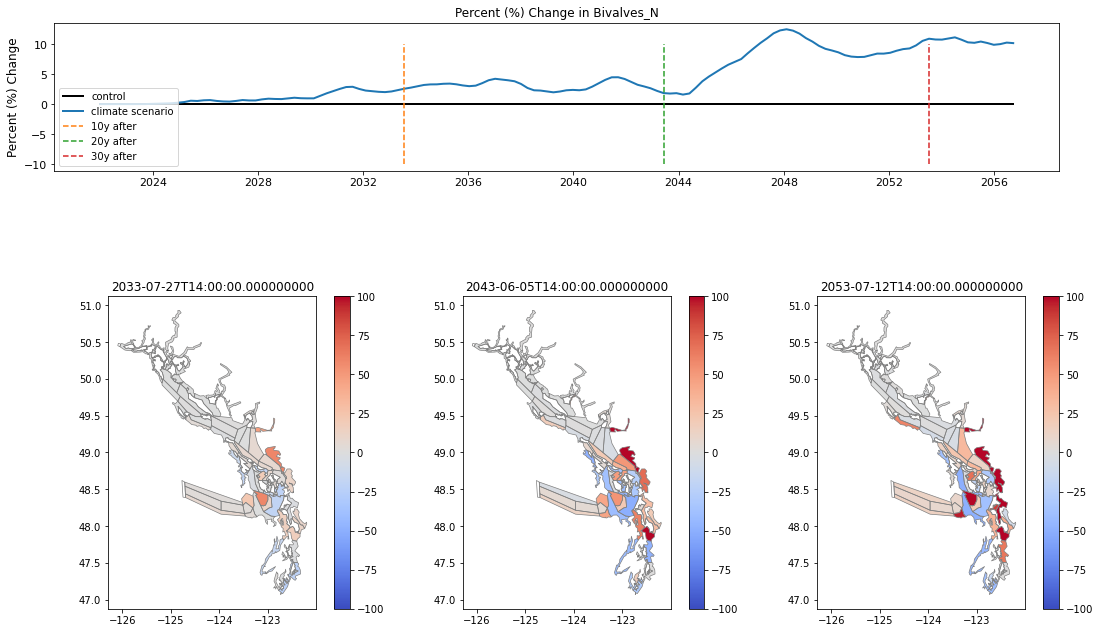

In [59]:
years = [47, 87, 128]
map_benthic('Bivalves_N', climate, control, time, years, start, end)

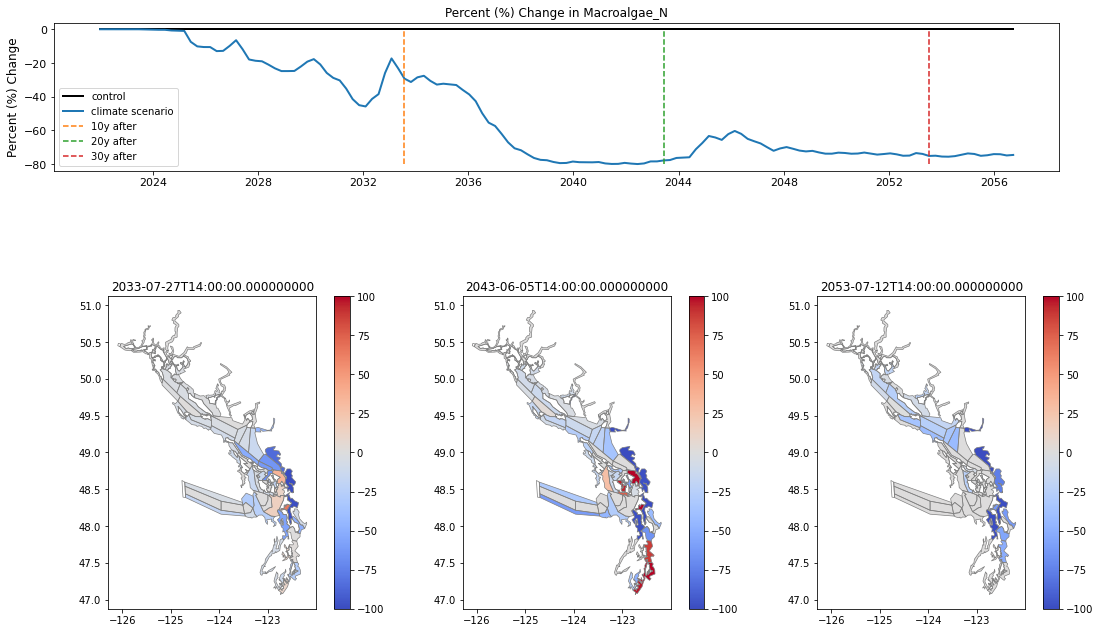

In [62]:
map_benthic('Macroalgae_N', climate, control, time, years, start, end)

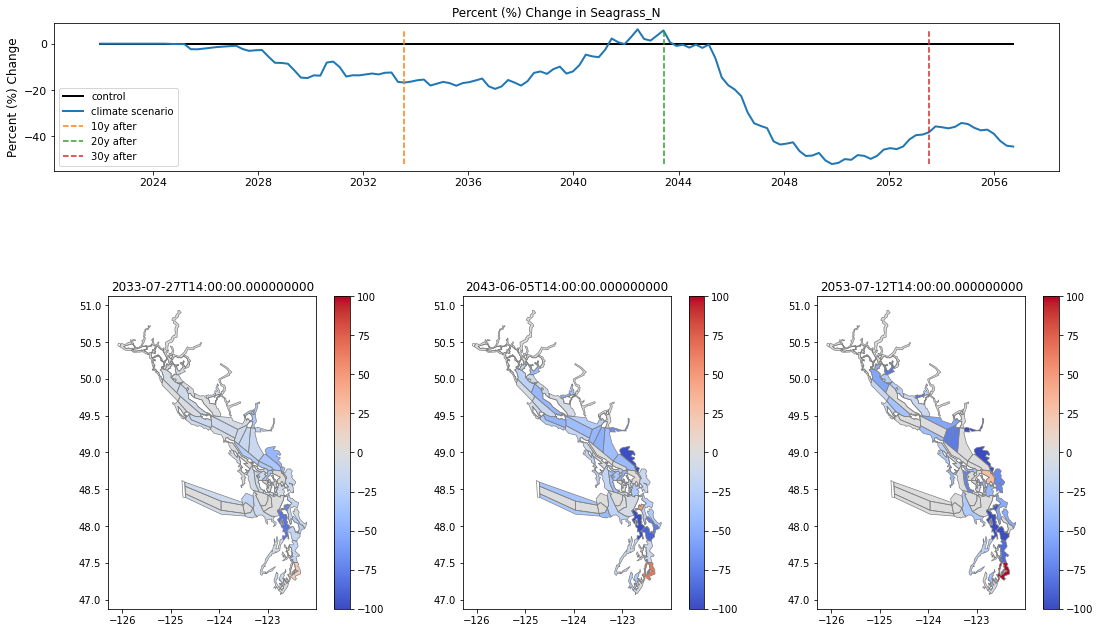

In [63]:
map_benthic('Seagrass_N', climate, control, time, years, start, end)

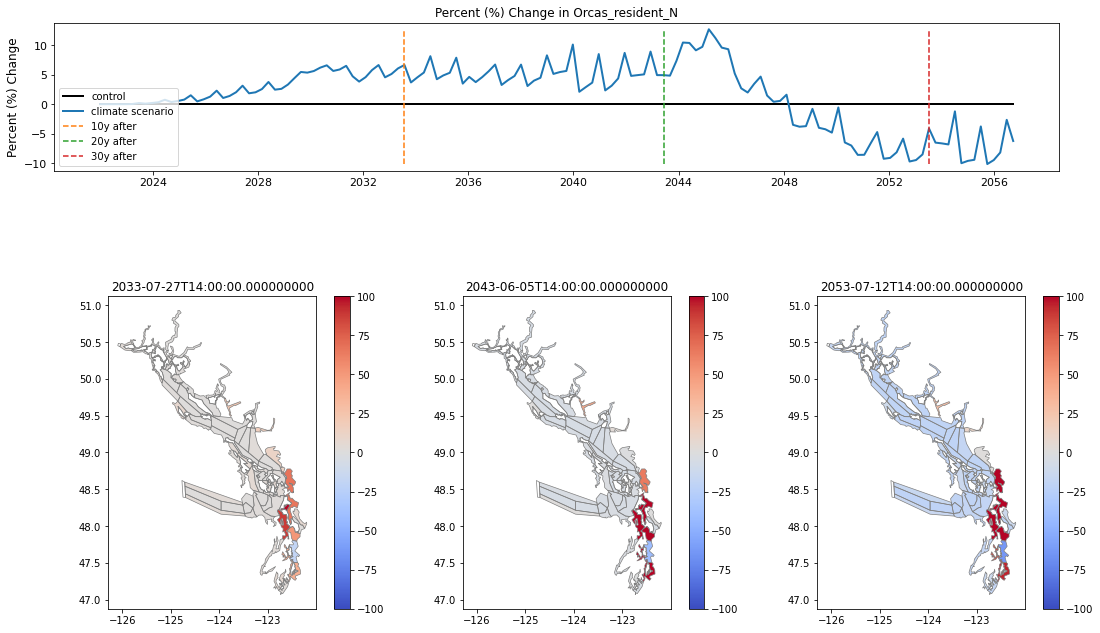

In [66]:
map_pelagic('Orcas_resident_N', climate, control, time, years, start, end)

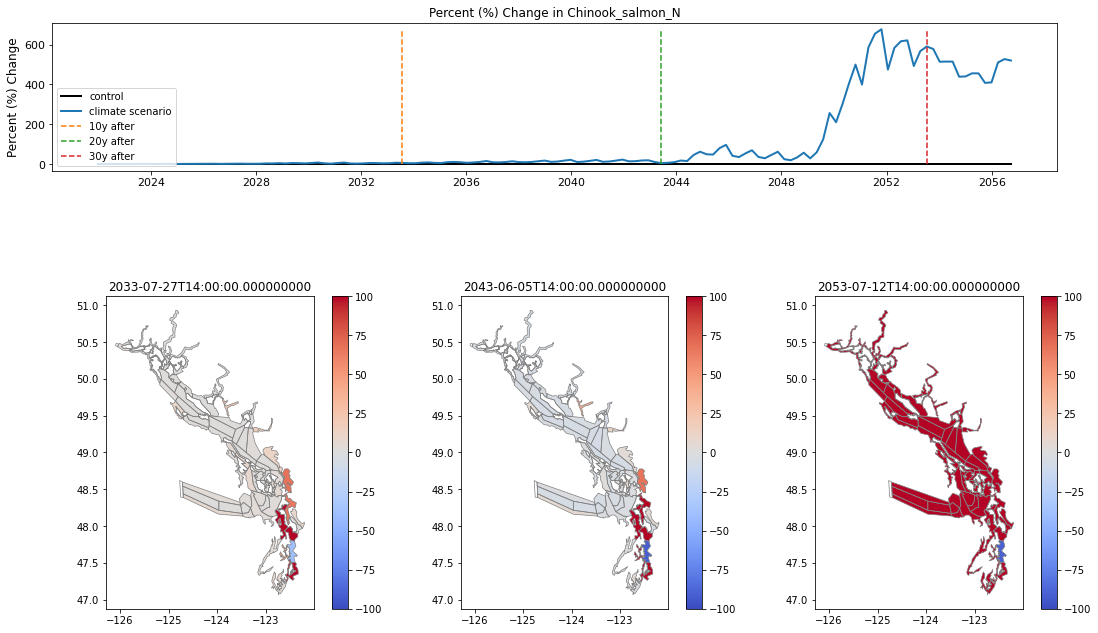

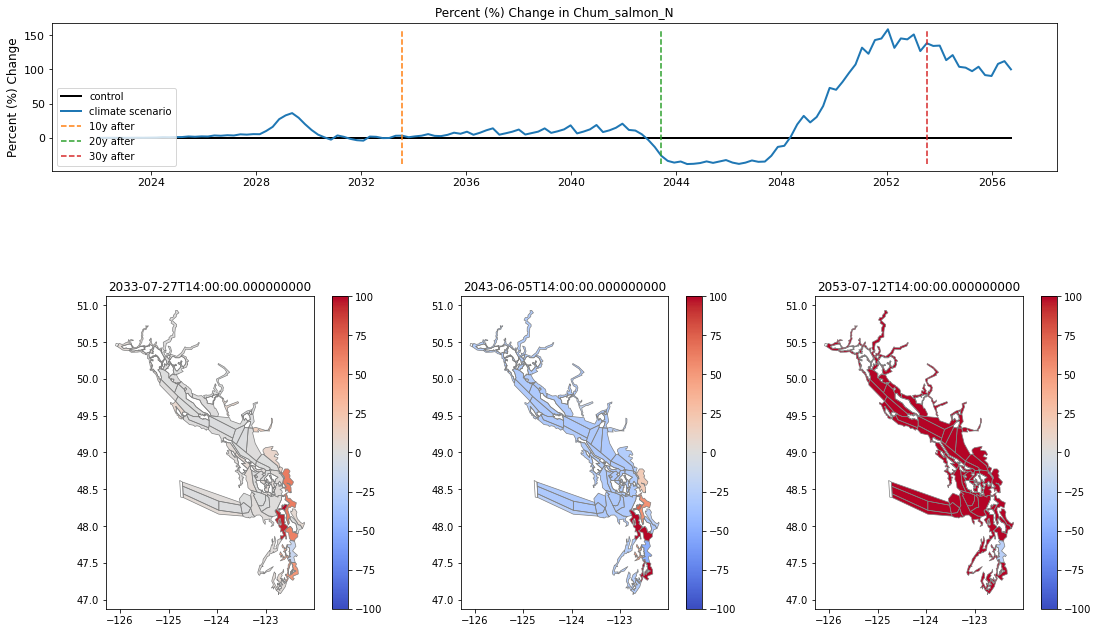

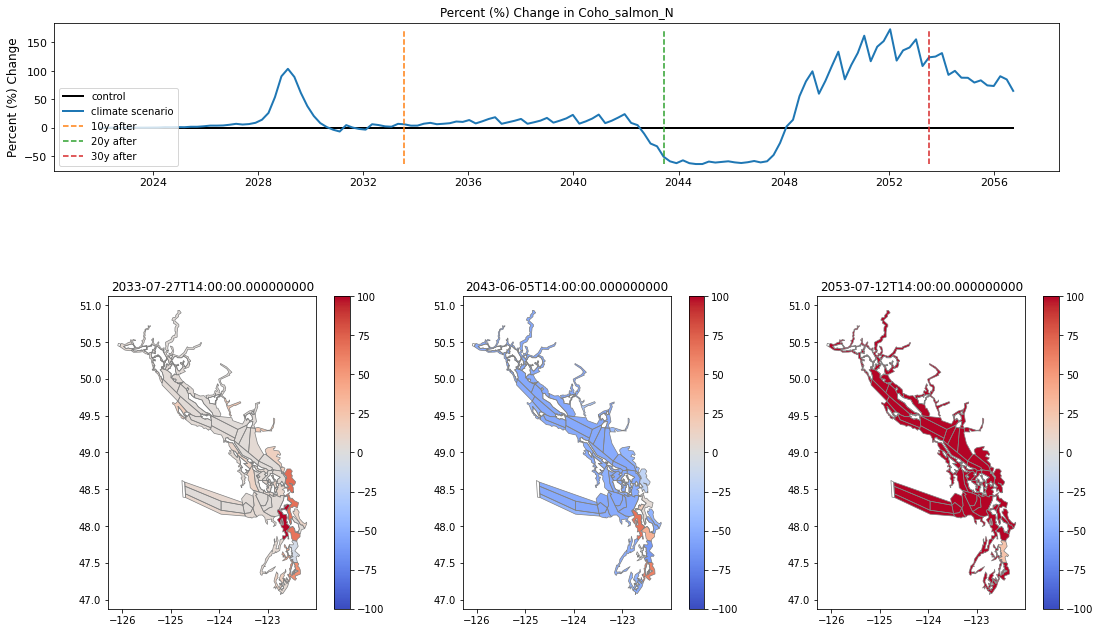

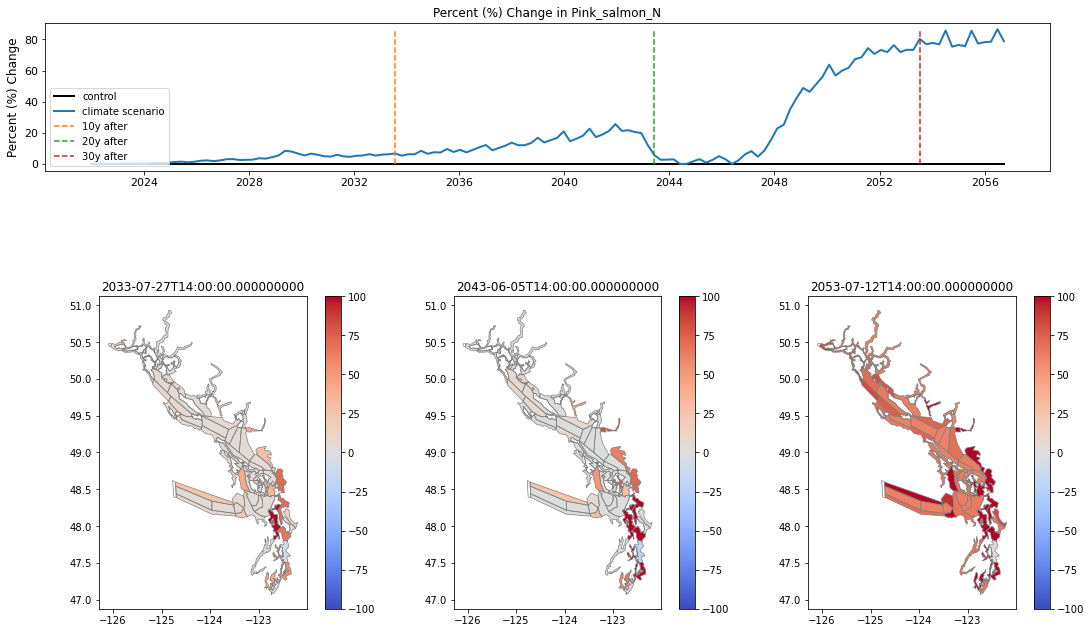

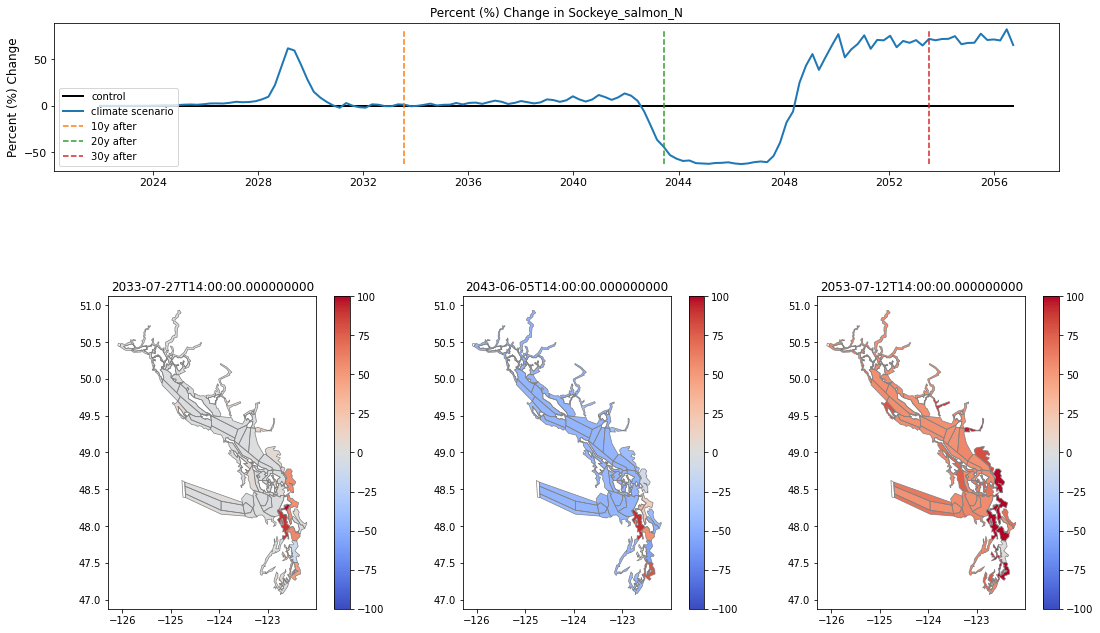

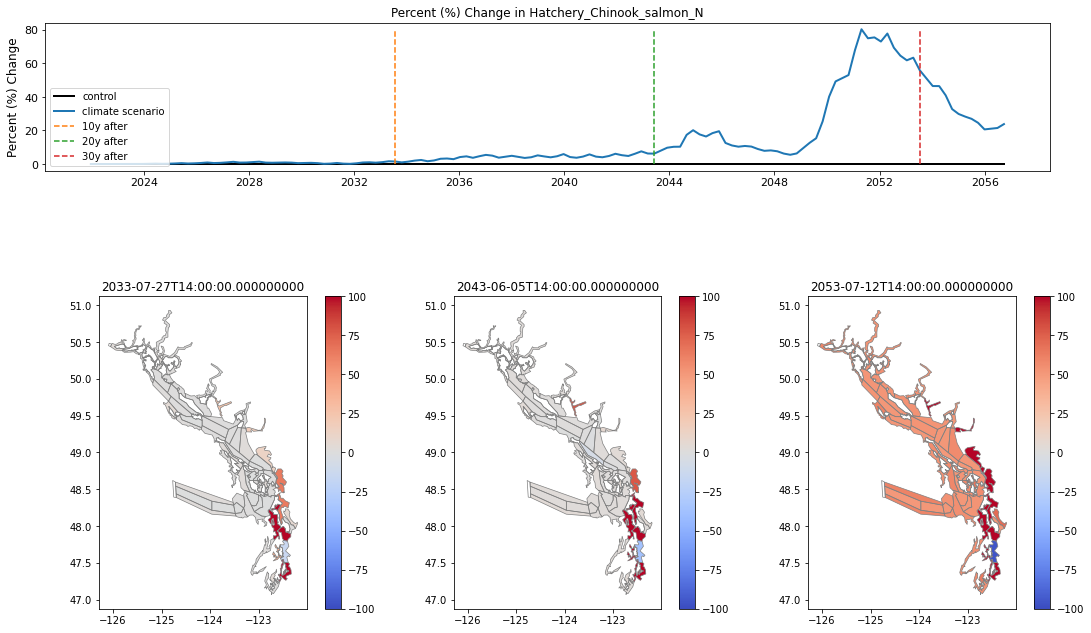

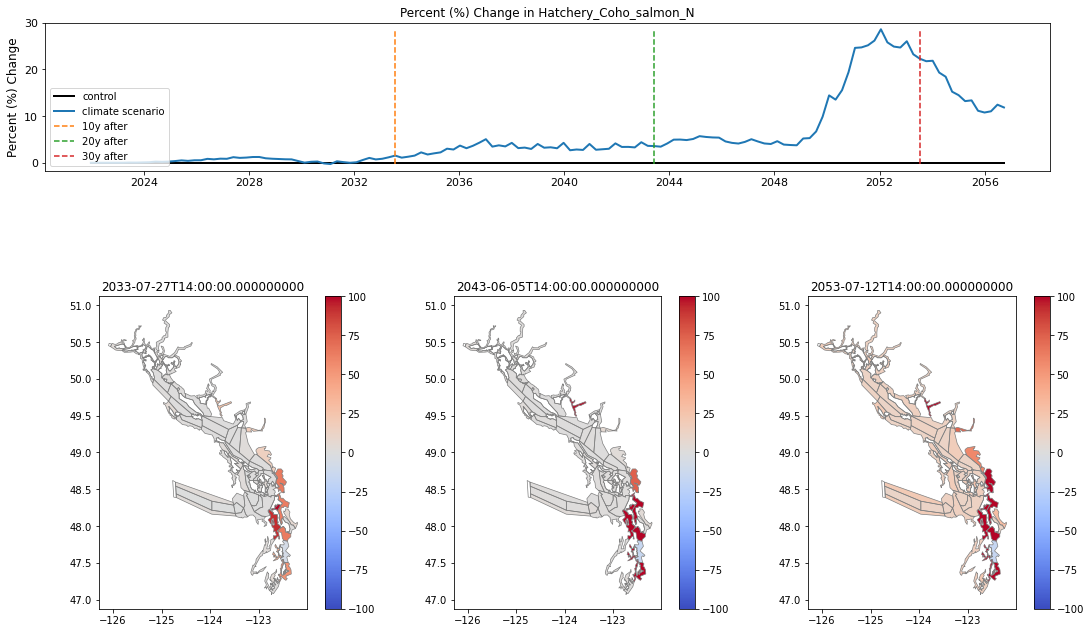

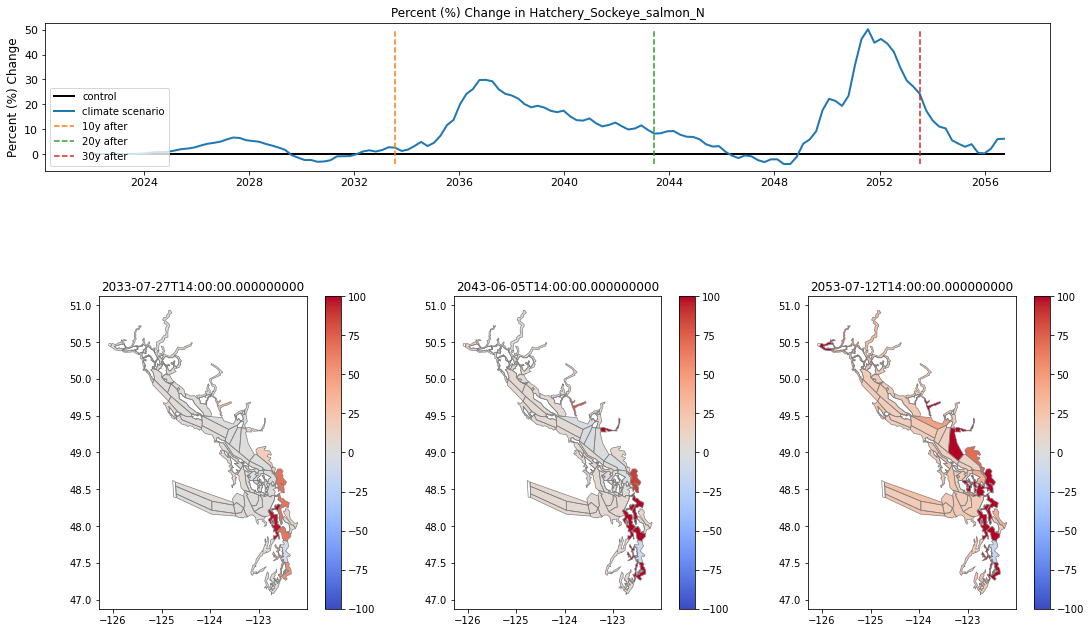

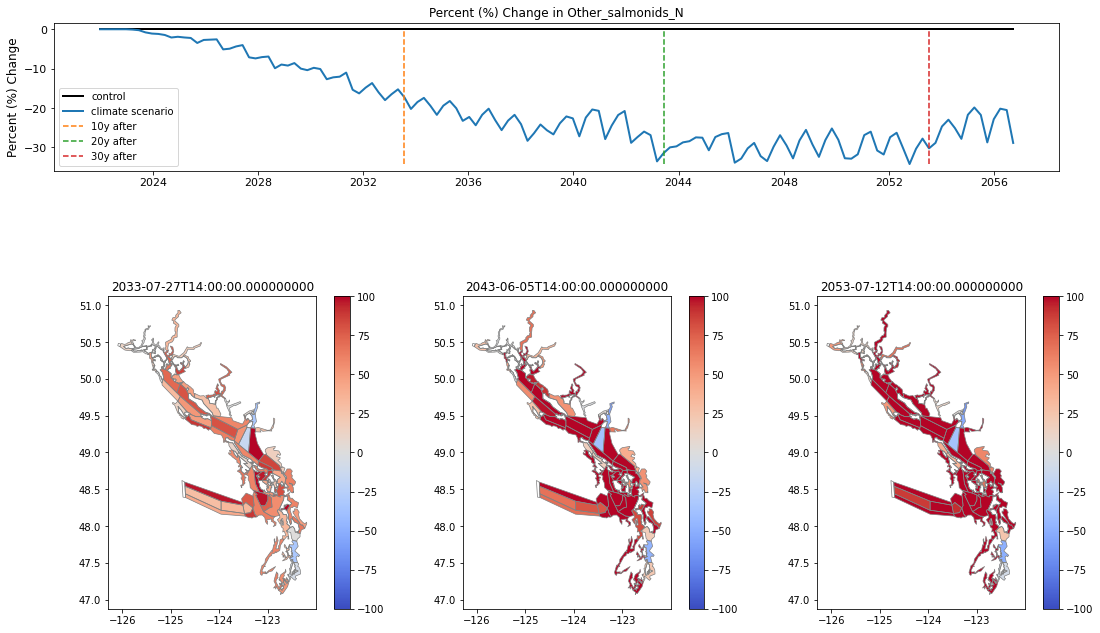

In [71]:
for species in groups.salmon:
    variable = groups.salmon[species] + '_N'
    map_pelagic(variable, climate, control, time, years, start, end)

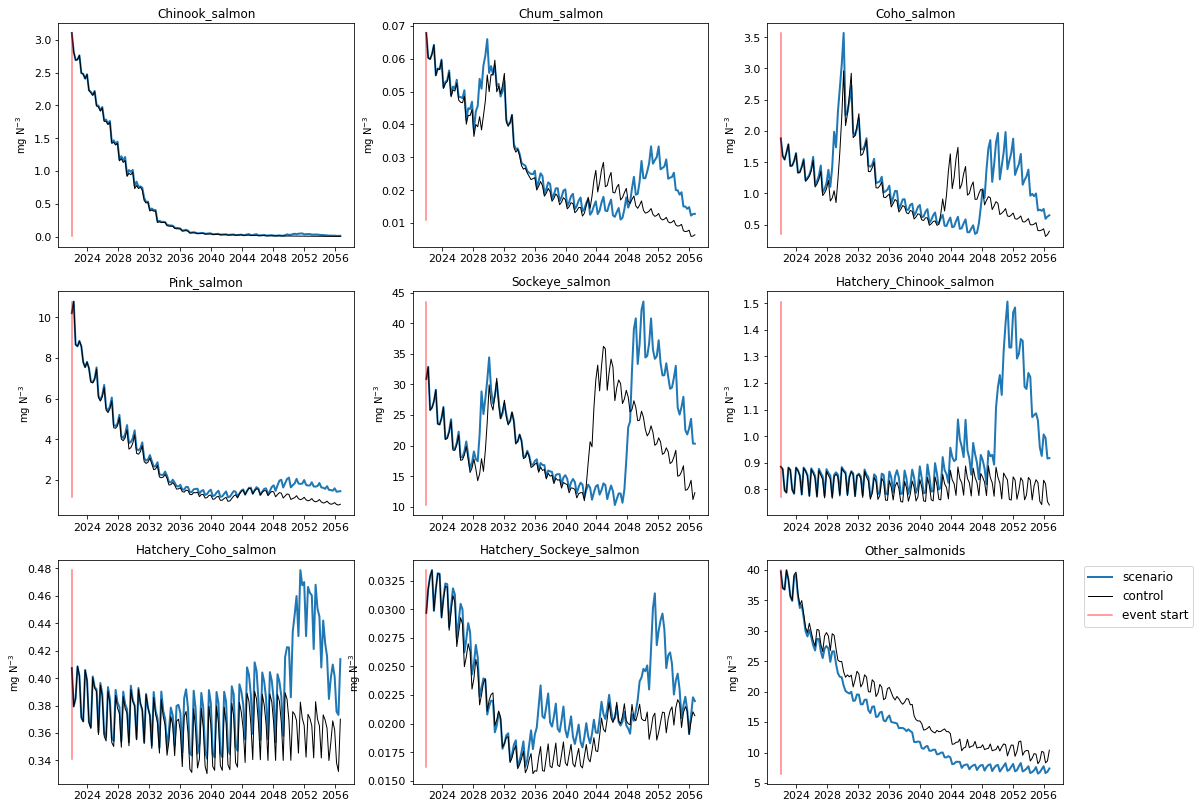

In [72]:
splot.plot_pelagic_biomass(groups.salmon, climate, control, time, start, end, event_start)